In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

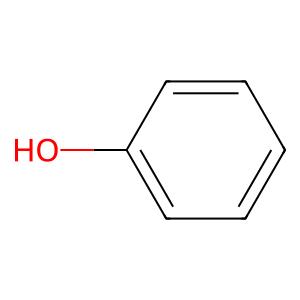

In [3]:
smiles = "c1ccc(O)cc1"
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)

In [4]:
smiles2 = "c1cc(O)ccc1"
print(Chem.MolToSmiles(Chem.MolFromSmiles(smiles2)))
print(Chem.MolToSmiles(Chem.MolFromSmiles(smiles)))

Oc1ccccc1
Oc1ccccc1


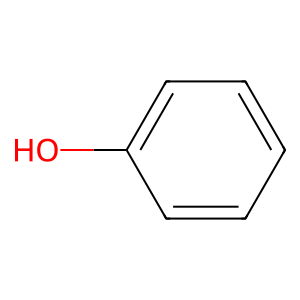

In [5]:
mol = Chem.MolFromSmiles(smiles2)
Draw.MolToImage(mol)

In [6]:
caffiene_smiles = "Cn1cnc2c1c(=O)n(C)c(=O)n2C"

In [7]:
caffiene = Chem.MolFromSmiles(caffiene_smiles)

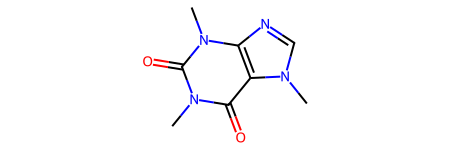

In [8]:
caffiene

In [9]:
im = Draw.MolToImage(caffiene)
im.save("caffeine.png")

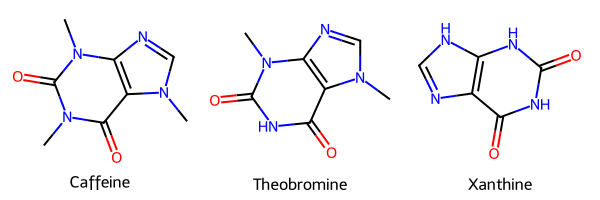

In [10]:
theobromine = Chem.MolFromSmiles("Cn1cnc2c1c(=O)[nH]c(=O)n2C")
xanthine = Chem.MolFromSmiles("O=C1NC(=O)c2nc[nH]c2N1")

mols = (caffiene, theobromine, xanthine)
names = ("Caffeine", "Theobromine", "Xanthine")

grid = Draw.MolsToGridImage(mols, legends=names)
grid

In [11]:
png = grid.data

with open('./grid_mols.png', 'wb+') as outf:
    outf.write(png)

In [12]:
n_atoms = caffiene.GetNumAtoms()
print(f"Caffeine has {n_atoms} atoms.")

n_bonds = caffiene.GetNumBonds()
print(f"Caffeine has {n_bonds} bonds.")

Caffeine has 14 atoms.
Caffeine has 15 bonds.


In [13]:
for atom in caffiene.GetAtoms():
    print(f"Atom index: {atom.GetIdx()}, Element: {atom.GetSymbol()}")

Atom index: 0, Element: C
Atom index: 1, Element: N
Atom index: 2, Element: C
Atom index: 3, Element: N
Atom index: 4, Element: C
Atom index: 5, Element: C
Atom index: 6, Element: C
Atom index: 7, Element: O
Atom index: 8, Element: N
Atom index: 9, Element: C
Atom index: 10, Element: C
Atom index: 11, Element: O
Atom index: 12, Element: N
Atom index: 13, Element: C


In [14]:
atoms = list(caffiene.GetAtoms())
for atom in atoms:
    print(atom.GetAtomicNum())

6
7
6
7
6
6
6
8
7
6
6
8
7
6


In [15]:
bonds = list(caffiene.GetBonds())
for bond in bonds:
    begin_atom = bond.GetBeginAtom()
    end_atom = bond.GetEndAtom()

    print(bond.GetBeginAtomIdx(), begin_atom.GetSymbol() ,bond.GetEndAtomIdx(), end_atom.GetSymbol(), bond.GetBondType())

0 C 1 N SINGLE
1 N 2 C AROMATIC
2 C 3 N AROMATIC
3 N 4 C AROMATIC
4 C 5 C AROMATIC
5 C 6 C AROMATIC
6 C 7 O DOUBLE
6 C 8 N AROMATIC
8 N 9 C SINGLE
8 N 10 C AROMATIC
10 C 11 O DOUBLE
10 C 12 N AROMATIC
12 N 13 C SINGLE
5 C 1 N AROMATIC
12 N 4 C AROMATIC


In [16]:
atom = caffiene.GetAtomWithIdx(3)

print(atom.GetSymbol())
print(atom.GetTotalDegree())
print(atom.GetDegree())
print(atom.GetHybridization())

N
2
2
SP2


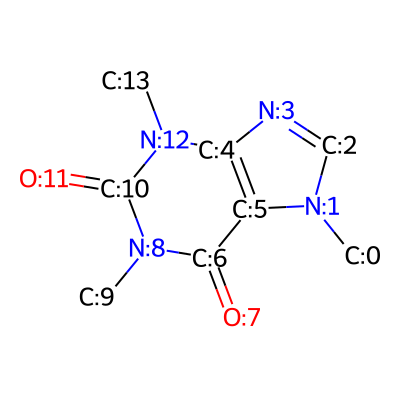

In [17]:
mol = Chem.MolFromSmiles("Cn1cnc2c1c(=O)n(C)c(=O)n2C")

for atom in mol.GetAtoms():
    atom.SetProp("atomLabel", atom.GetSymbol() + ':' + str(atom.GetIdx()))

img = Draw.MolToImage(mol, size=(400, 400))
img

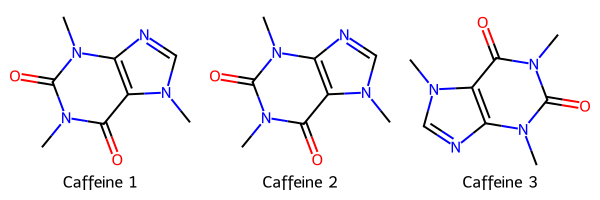

In [18]:
caffiene1 = "Cn1cnc2c1c(=O)n(C)c(=O)n2C"
caffeine2 = 'Cn1cnc2c1c(=O)n(C)c(=O)n2C'
caffeine3 = 'Cn1c(=O)c2c(ncn2C)n(C)c1=O'

smiles_list = [caffiene1, caffeine2, caffeine3]

mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

Draw.MolsToGridImage(mols, legends=["Caffeine 1", "Caffeine 2", "Caffeine 3"])

In [19]:
def canonicalize_smiles(smiles):
    '''This function takes a non-canonical SMILES and
    returns the canonical version
    
    Args: 
        -smiles: str, non-canonical SMILES of a molecule
    
    Out:
        - canonical_smiles: str, canonical SMILES of the molecule
    '''
    
    ####YOUR CODE HERE

    mol = Chem.MolFromSmiles(smiles)#create a mol object from input smiles 

    canonical_smiles = Chem.MolToSmiles(mol)#convert the previous mol object to SMILES using Chem.MolToSmiles()
    
    ####END
    return canonical_smiles

In [20]:
canonical_smiles = [canonicalize_smiles(smiles) for smiles in smiles_list]

for can_smiles in canonical_smiles:
    print(can_smiles)

Cn1c(=O)c2c(ncn2C)n(C)c1=O
Cn1c(=O)c2c(ncn2C)n(C)c1=O
Cn1c(=O)c2c(ncn2C)n(C)c1=O


In [21]:
from rdkit.Chem import rdFingerprintGenerator

mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius = 2, fpSize=2048)

caffiene_fp = mfpgen.GetFingerprint(caffiene)

print(caffiene_fp)
print(caffiene_fp.GetNumBits())

caffiene_fp.ToList()

2048


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [22]:
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles("Cn1cnc2n(C)c(=O)n(C)c(=O)c12")   # caffeine

bitInfo = {}  #substructure_id → [(atom_idx, radius)]

fp = AllChem.GetMorganFingerprint(mol, radius=3, bitInfo=bitInfo)

print("Total unique substructures:", len(bitInfo))

for sub_id, atom_r_list in bitInfo.items():
    print("\n-----------------------------------")
    print("Substructure ID:", sub_id)
    
    for atom_idx, radius in atom_r_list:
        print("  Atom index:", atom_idx)
        print("  Radius:", radius)

        env_atoms = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, atom_idx)
        
        atom_set = set([atom_idx])
        for bond_idx in env_atoms:
            bond = mol.GetBondWithIdx(bond_idx)
            atom_set.add(bond.GetBeginAtomIdx())
            atom_set.add(bond.GetEndAtomIdx())

        atom_list = list(atom_set)

        frag = Chem.MolFragmentToSmiles(mol, atomsToUse=atom_list)
        print("  Fragment SMILES:", frag)


Total unique substructures: 34

-----------------------------------
Substructure ID: 10565946
  Atom index: 8
  Radius: 1
  Fragment SMILES: c=O
  Atom index: 12
  Radius: 1
  Fragment SMILES: c=O

-----------------------------------
Substructure ID: 307281801
  Atom index: 3
  Radius: 3
  Fragment SMILES: cc1c(ncn1C)n(C)c

-----------------------------------
Substructure ID: 348155210
  Atom index: 13
  Radius: 2
  Fragment SMILES: Cn1cnc(n)c1c(=O)n

-----------------------------------
Substructure ID: 476388586
  Atom index: 9
  Radius: 2
  Fragment SMILES: cc(=O)n(C)c(=O)n

-----------------------------------
Substructure ID: 540046244
  Atom index: 2
  Radius: 1
  Fragment SMILES: ncn

-----------------------------------
Substructure ID: 553412256
  Atom index: 4
  Radius: 1
  Fragment SMILES: cc(n)n

-----------------------------------
Substructure ID: 864942730
  Atom index: 8
  Radius: 0
  Fragment SMILES: O
  Atom index: 12
  Radius: 0
  Fragment SMILES: O

--------------------

In [23]:
from rdkit.DataStructs import FingerprintSimilarity

toluene = Chem.MolFromSmiles("Cc1ccccc1")

toluene_fp = mfpgen.GetFingerprint(toluene)
theobromine_fp = mfpgen.GetFingerprint(theobromine)

sim1 = FingerprintSimilarity(caffiene_fp, toluene_fp)
sim2 = FingerprintSimilarity(caffiene_fp, theobromine_fp)

print(f"Similarity between caffeine and toluene: {round(sim1, 3)}".format())
print(f"Similarity between caffeine and theobromine: {round(sim2, 3)}")

Similarity between caffeine and toluene: 0.091
Similarity between caffeine and theobromine: 0.529


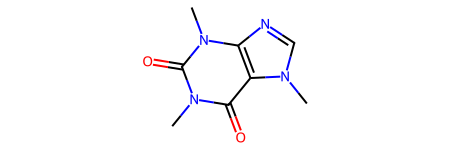

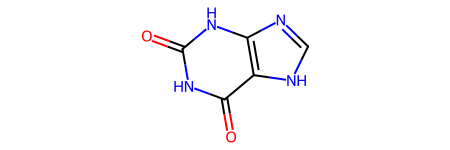

In [24]:
from rdkit.Chem.Scaffolds import MurckoScaffold

#Get Murcko Scaffold from a mol object
caff_scaffold = MurckoScaffold.GetScaffoldForMol(caffiene)

#Show original molecule
display(caffiene)

#Show Murcko scaffold
caff_scaffold

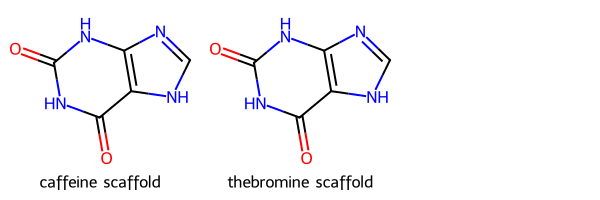

In [25]:
#compute theobromine scaffold
theobr_scaffold = MurckoScaffold.GetScaffoldForMol(theobromine)

#draw both scaffolds as a GridImage
Draw.MolsToGridImage([caff_scaffold, theobr_scaffold], legends=['caffeine scaffold', 'thebromine scaffold'])

0. Original Molecule


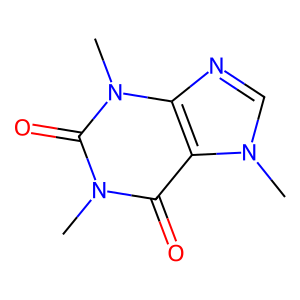


1. Ring Atoms Detected


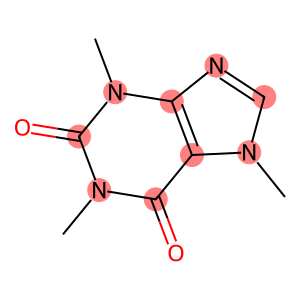


2. Linker Atoms


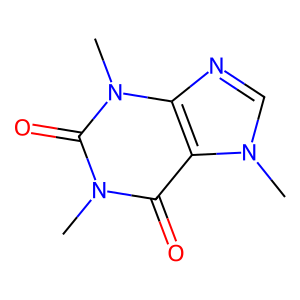


3. Side Chains (Atoms to be Removed)


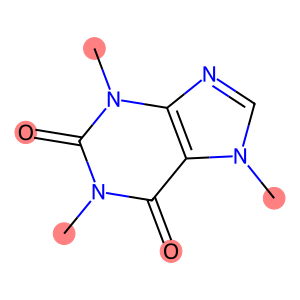


4. Bemis–Murcko Scaffold (Final Core)


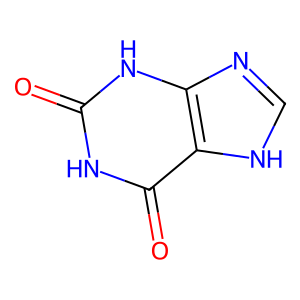

In [26]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold

mol = Chem.MolFromSmiles("Cn1cnc2n(C)c(=O)n(C)c(=O)c12")

print("0. Original Molecule")
display(Draw.MolToImage(mol))


ring_info = mol.GetRingInfo()
ring_atoms = set([a for ring in ring_info.AtomRings() for a in ring])

print("\n1. Ring Atoms Detected")
display(Draw.MolToImage(mol, highlightAtoms=list(ring_atoms)))

linkers = set()
for atom in mol.GetAtoms():
    if atom.GetIdx() not in ring_atoms:
        # Count how many neighbors are in rings
        ring_neighbors = sum(1 for n in atom.GetNeighbors() if n.GetIdx() in ring_atoms)
        if ring_neighbors >= 2:
            linkers.add(atom.GetIdx())

print("\n2. Linker Atoms")
display(Draw.MolToImage(mol, highlightAtoms=list(linkers)))

side_chains = set(a.GetIdx() for a in mol.GetAtoms()) - ring_atoms - linkers

print("\n3. Side Chains (Atoms to be Removed)")
display(Draw.MolToImage(mol, highlightAtoms=list(side_chains)))
scaffold = MurckoScaffold.GetScaffoldForMol(mol)

print("\n4. Bemis–Murcko Scaffold (Final Core)")
display(Draw.MolToImage(scaffold))

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/schwallergroup/ai4chem_course/main/notebooks/01%20-%20Basics/data/delaney-processed.csv")

df = df[['Compound ID','measured log solubility in mols per litre','smiles']]

df = df.rename(columns={'measured log solubility in mols per litre':'Solubility'})
df.head()

,Compound ID,Solubility,smiles
0,Amigdalin,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-1.33,c1ccsc1


In [28]:
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(df, smilesCol = 'smiles', molCol = 'Molecule')
df.head()

,Compound ID,Solubility,smiles,Molecule
0,Amigdalin,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...
1,Fenfuram,-3.30,Cc1occc1C(=O)Nc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...
2,citral,-2.06,CC(C)=CCCC(C)=CC(=O),<rdkit.Chem.rdchem.Mol object at 0x000002379CB...
3,Picene,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...
4,Thiophene,-1.33,c1ccsc1,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...


,Compound ID,Solubility,smiles,Molecule
0,Amigdalin,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,
1,Fenfuram,-3.300,Cc1occc1C(=O)Nc2ccccc2,
2,citral,-2.060,CC(C)=CCCC(C)=CC(=O),
3,Picene,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,
4,Thiophene,-1.330,c1ccsc1,
...,...,...,...,...
1123,halothane,-1.710,FC(F)(F)C(Cl)Br,
1124,Oxamyl,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C,
1125,Thiometon,-3.091,CCSCCSP(=S)(OC)OC,
1126,2-Methylbutane,-3.180,CCC(C)C,

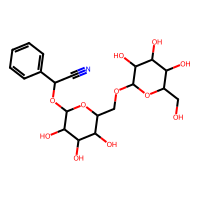
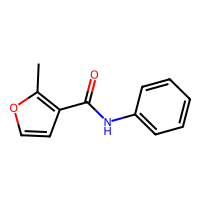
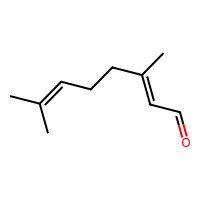
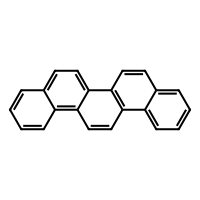
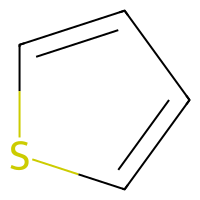
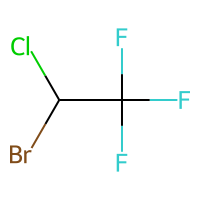
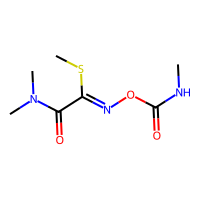
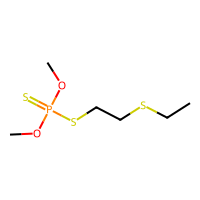
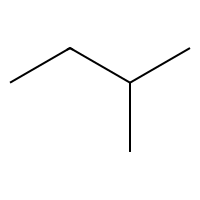
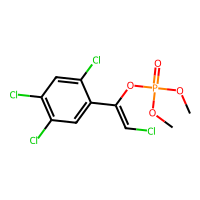

In [29]:
df

In [30]:
df['canonical_smiles'] = df['smiles'].apply(canonicalize_smiles)
df.head()

,Compound ID,Solubility,smiles,Molecule,canonical_smiles
0,Amigdalin,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...
1,Fenfuram,-3.30,Cc1occc1C(=O)Nc2ccccc2,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,Cc1occc1C(=O)Nc1ccccc1
2,citral,-2.06,CC(C)=CCCC(C)=CC(=O),<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,CC(C)=CCCC(C)=CC=O
3,Picene,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21
4,Thiophene,-1.33,c1ccsc1,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,c1ccsc1


In [31]:
df=df.drop(columns=['smiles'])
df.head()

,Compound ID,Solubility,Molecule,canonical_smiles
0,Amigdalin,-0.77,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...
1,Fenfuram,-3.30,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,Cc1occc1C(=O)Nc1ccccc1
2,citral,-2.06,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,CC(C)=CCCC(C)=CC=O
3,Picene,-7.87,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21
4,Thiophene,-1.33,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,c1ccsc1


In [32]:
from rdkit.Chem import Descriptors

df['MW'] = df['Molecule'].apply(Chem.Descriptors.MolWt)
df.head()

,Compound ID,Solubility,Molecule,canonical_smiles,MW
0,Amigdalin,-0.77,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,457.432
1,Fenfuram,-3.30,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,Cc1occc1C(=O)Nc1ccccc1,201.225
2,citral,-2.06,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,CC(C)=CCCC(C)=CC=O,152.237
3,Picene,-7.87,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21,278.354
4,Thiophene,-1.33,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,c1ccsc1,84.143


In [34]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

descriptors = [
    'TPSA',
    'MolLogP',
    'NumHAcceptors',
    'NumHDonors',
    'RingCount',
    'NumAromaticHeterocycles'
]

calculator = MolecularDescriptorCalculator(descriptors)

properties = df['Molecule'].apply(calculator.CalcDescriptors)

properties

0       (202.31999999999996, -3.1080199999999985, 12, ...
1                  (42.24, 2.840320000000001, 2, 1, 2, 1)
2                  (17.07, 2.878000000000001, 1, 0, 0, 0)
3                    (0.0, 6.299400000000004, 0, 0, 5, 0)
4                   (0.0, 1.7480999999999998, 1, 0, 1, 1)
                              ...                        
1123                (0.0, 2.5084999999999997, 0, 0, 0, 0)
1124    (70.99999999999999, 0.10709999999999997, 5, 1,...
1125               (18.46, 2.990000000000001, 5, 0, 0, 0)
1126                            (0.0, 2.0524, 0, 0, 0, 0)
1127    (44.760000000000005, 5.6015000000000015, 4, 0,...
Name: Molecule, Length: 1128, dtype: object

In [36]:
df_properties = pd.DataFrame(properties.tolist(), columns = descriptors)
df_properties['Compound ID'] = df['Compound ID']
df_properties.head()

,TPSA,MolLogP,NumHAcceptors,NumHDonors,RingCount,NumAromaticHeterocycles,Compound ID
0,202.32,-3.10802,12,7,3,0,Amigdalin
1,42.24,2.84032,2,1,2,1,Fenfuram
2,17.07,2.87800,1,0,0,0,citral
3,0.00,6.29940,0,0,5,0,Picene
4,0.00,1.74810,1,0,1,1,Thiophene


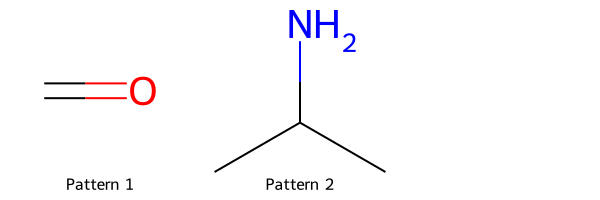

In [37]:
patt1 = Chem.MolFromSmiles("C=O")
patt2 = Chem.MolFromSmiles("CC(N)C")

Draw.MolsToGridImage([patt1, patt2], legends = ['Pattern 1', 'Pattern 2'])

In [38]:
check_p1 = caffiene.HasSubstructMatch(patt1)
print('Contains pattern 1: {}'.format(check_p1))

check_p2 = caffiene.HasSubstructMatch(patt2)
print('Contains pattern 2: {}'.format(check_p2))

Contains pattern 1: True
Contains pattern 2: False


[(2,), (4,), (5,), (6,), (10,)]


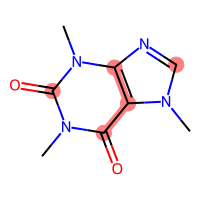

In [46]:
from IPython.display import SVG

patt = '[#6;r]'
patt = Chem.MolFromSmarts(patt)

matches = caffiene.GetSubstructMatches(patt)

matches_list = list(matches)
print(matches_list)

highlightAtomlists = [atom[0] for atom in matches]

SVG(Draw._MolsToGridSVG([caffiene], highlightAtomLists=[highlightAtomlists], molsPerRow=1))

In [49]:
phenyl = Chem.MolFromSmiles('c1ccccc1')

df['phenyl'] = df['Molecule'].apply(lambda x: x.HasSubstructMatch(phenyl))

df_phenyl = df[df['phenyl']]
print(f'There are {len(df_phenyl)} compounds containing a phenyl group.')
df_phenyl.head()

There are 565 compounds containing a phenyl group.


,Compound ID,Solubility,Molecule,canonical_smiles,MW,phenyl
0,Amigdalin,-0.77,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,457.432,True
1,Fenfuram,-3.30,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,Cc1occc1C(=O)Nc1ccccc1,201.225,True
3,Picene,-7.87,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21,278.354,True
5,benzothiazole,-1.50,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,c1ccc2scnc2c1,135.191,True
6,"2,2,4,6,6'-PCB",-7.32,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,Clc1cc(Cl)c(-c2c(Cl)cccc2Cl)c(Cl)c1,326.437,True


c:\Users\aryan\AppData\Local\Programs\Python\Python313\Lib\site-packages\rdkit\Chem\PandasTools.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,Compound ID,Solubility,Molecule,canonical_smiles,MW,phenyl
0,Amigdalin,-0.770,,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,457.432,True
1,Fenfuram,-3.300,,Cc1occc1C(=O)Nc1ccccc1,201.225,True
3,Picene,-7.870,,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21,278.354,True
5,benzothiazole,-1.500,,c1ccc2scnc2c1,135.191,True
6,"2,2,4,6,6'-PCB",-7.320,,Clc1cc(Cl)c(-c2c(Cl)cccc2Cl)c(Cl)c1,326.437,True
...,...,...,...,...,...,...
1117,Chlorthalidone,-3.451,,NS(=O)(=O)c1cc(C2(O)NC(=O)c3ccccc32)ccc1Cl,338.772,True
1120,"2,3,3',4,4'6-PCB",-7.660,,Clc1ccc(-c2c(Cl)cc(Cl)c(Cl)c2Cl)c(Cl)c1Cl,395.327,True
1121,Phthalonitrile,-2.380,,N#Cc1ccccc1C#N,128.134,True
1122,m-Nitrotoluene,-2.440,,Cc1cccc([N+](=O)[O-])c1,137.138,True

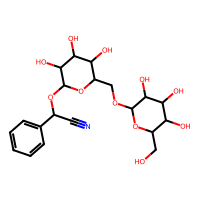
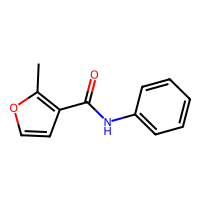
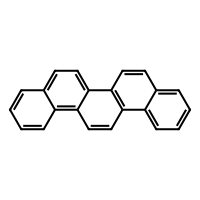
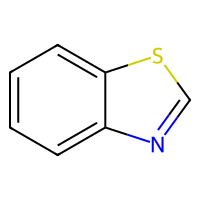
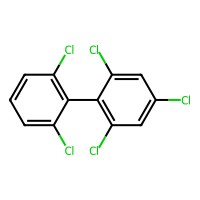
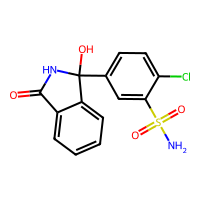
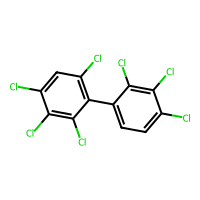
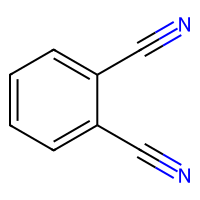
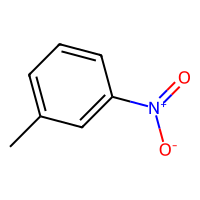
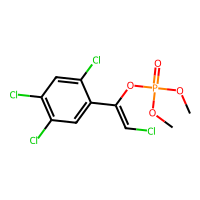

In [51]:
PandasTools.AddMoleculeColumnToFrame(df_phenyl, smilesCol = 'canonical_smiles', molCol = 'Molecule')

df_phenyl

In [52]:
ring = Chem.MolFromSmarts('[R]')

df['ring'] = df['Molecule'].apply(lambda x: x.HasSubstructMatch(ring))

df_ring = df[df['ring']]
print(f'There are {len(df_ring)} compounds containing a ring structure.')
df_ring.head()


There are 811 compounds containing a ring structure.


,Compound ID,Solubility,Molecule,canonical_smiles,MW,phenyl,ring
0,Amigdalin,-0.77,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,N#CC(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)C(O)C1O)c...,457.432,True,True
1,Fenfuram,-3.30,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,Cc1occc1C(=O)Nc1ccccc1,201.225,True,True
3,Picene,-7.87,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,c1ccc2c(c1)ccc1c2ccc2c3ccccc3ccc21,278.354,True,True
4,Thiophene,-1.33,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,c1ccsc1,84.143,False,True
5,benzothiazole,-1.50,<rdkit.Chem.rdchem.Mol object at 0x000002379CB...,c1ccc2scnc2c1,135.191,True,True
